In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
#import the dataset Churn_modelling.csv
dataset=pd.read_csv("Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#divide the dataset into X DataFrame and y DataFrame
# In X Dataframe ignore the columns like RowNumber,CustomerId,Surname and Exited
# in y DataFrame take the output column like Exited
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
#Create Dummy Variables for Geography and Gender and drop the first column
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)


In [7]:
#Concatenate the geography and gender to X-DataFrame 
X=pd.concat([X,geography,gender],axis=1)


In [8]:
#Delete the Geogryphy and Gender from X-DataFrame
X=X.drop(["Geography","Gender"],axis=1)


In [9]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [10]:
#Implementing the Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [11]:
#Implementing the ANN by Keras
#Import the Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import PReLU,LeakyReLU,PReLU,ELU
from keras.layers import Dense
from keras.layers import Dropout



In [12]:
#Initialising the ANN
classifier=Sequential()


In [13]:
#Adding the first Hiden Layer along with the  inputLayer
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [14]:
#Adding 2nd Hidden Layer
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))

In [15]:
#Adding the Output Layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [16]:
#Compilng the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=15,epochs=130)

Epoch 1/130
358/358 [==============================] - 1s 2ms/step - loss: 0.5927 - accuracy: 0.7819 - val_loss: 0.5347 - val_accuracy: 0.7955
Epoch 2/130
358/358 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7962 - val_loss: 0.4931 - val_accuracy: 0.7955
Epoch 3/130
358/358 [==============================] - 1s 2ms/step - loss: 0.4724 - accuracy: 0.7960 - val_loss: 0.4696 - val_accuracy: 0.7967
Epoch 4/130
358/358 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.7987 - val_loss: 0.4546 - val_accuracy: 0.7993
Epoch 5/130
358/358 [==============================] - 1s 1ms/step - loss: 0.4415 - accuracy: 0.8016 - val_loss: 0.4454 - val_accuracy: 0.8005
Epoch 6/130
358/358 [==============================] - 1s 2ms/step - loss: 0.4338 - accuracy: 0.8028 - val_loss: 0.4377 - val_accuracy: 0.8046
Epoch 7/130
358/358 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8059 - val_loss: 0.4330 - val_accuracy: 0.8092

Epoch 58/130
358/358 [==============================] - 1s 1ms/step - loss: 0.3416 - accuracy: 0.8621 - val_loss: 0.3595 - val_accuracy: 0.8531
Epoch 59/130
358/358 [==============================] - 1s 1ms/step - loss: 0.3414 - accuracy: 0.8610 - val_loss: 0.3589 - val_accuracy: 0.8565
Epoch 60/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8600 - val_loss: 0.3591 - val_accuracy: 0.8588
Epoch 61/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8625 - val_loss: 0.3585 - val_accuracy: 0.8561
Epoch 62/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8623 - val_loss: 0.3587 - val_accuracy: 0.8550
Epoch 63/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8628 - val_loss: 0.3573 - val_accuracy: 0.8569
Epoch 64/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8640 - val_loss: 0.3576 - val_accuracy:

Epoch 115/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8630 - val_loss: 0.3553 - val_accuracy: 0.8573
Epoch 116/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8651 - val_loss: 0.3551 - val_accuracy: 0.8573
Epoch 117/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8653 - val_loss: 0.3560 - val_accuracy: 0.8546
Epoch 118/130
358/358 [==============================] - 1s 1ms/step - loss: 0.3328 - accuracy: 0.8653 - val_loss: 0.3547 - val_accuracy: 0.8580
Epoch 119/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8649 - val_loss: 0.3541 - val_accuracy: 0.8599
Epoch 120/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8668 - val_loss: 0.3550 - val_accuracy: 0.8580
Epoch 121/130
358/358 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8655 - val_loss: 0.3542 - val_ac

In [18]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


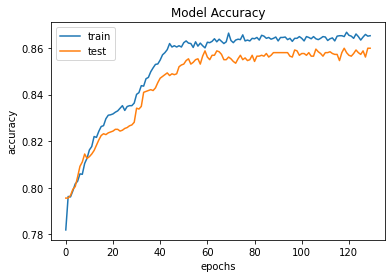

In [19]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train",'test'],loc='upper left')
plt.show()

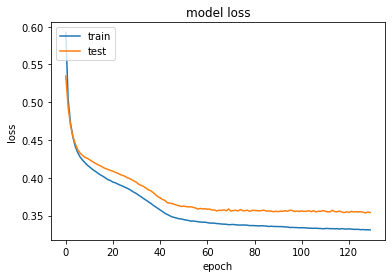

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)

[[1524   71]
 [ 215  190]]
0.857


In [23]:
#find the classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1595
           1       0.73      0.47      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

